Lab09 - XOR. Logistic Regression - Eager Execution
 * XOR문제를 Deep Neural Network을 통해 풀어보도록 하겠습니다.

# 기본 Library 선언 및 Tensorflow 버전 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.3.1'

# 강의 Data
 * x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data를 0과 1로 구분하는 예제입니다.
 * 붉은색과 푸른색으로 0과 1을 표시해보도록 하겠습니다.

Text(0, 0.5, 'x2')

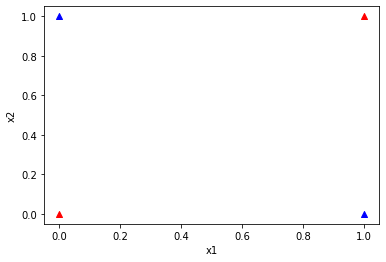

In [3]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1],c='red',marker='^')
plt.scatter(x_data[3][0],x_data[3][1],c='red',marker='^')
plt.scatter(x_data[1][0],x_data[1][1],c='blue',marker='^')
plt.scatter(x_data[2][0],x_data[2][1],c='blue',marker='^')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorflow Eager

 * Tensorflow data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다.)
 * features, labels는 실제 학습에 쓰일 Data(연산을 위해 Type을 맞춘다.)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self,nb_classes):
        super(wide_deep_nn,self).__init__()
        
        self.W1 = tf.Variable(tf.random.normal((2,nb_classes)),name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)),name='bias1')
        
        self.W2 = tf.Variable(tf.random.normal((nb_classes,nb_classes)),name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)),name='bias2')
        
        self.W3 = tf.Variable(tf.random.normal((nb_classes,nb_classes)),name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)),name='bias3')
        
        self.W4 = tf.Variable(tf.random.normal((nb_classes,1)),name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)),name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
    
    def preprocess_data(self,features,labels):
        features = tf.cast(features,tf.float32)
        labels = tf.cast(labels,tf.float32)
        return features, labels
    
    def deep_nn(self,features):
        layer1 = tf.sigmoid(tf.matmul(features,self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1,self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2,self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3,self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self,hypothesis,features,labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1-labels) * tf.math.log(1 - hypothesis))
        return cost
    
    def accuracy_fn(self,hypothesis,labels):
        predicted = tf.cast(hypothesis > 0.5,dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
        return accuracy
    
    def grad(self,hypothesis,features,labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self,dataset,epochs=20000,verbose=500):
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(epochs):
            for features, labels in dataset:
                features, labels = self.preprocess_data(features,labels)
                grads = self.grad(self.deep_nn(features),features,labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads,self.variables))
                if step % verbose == 0:
                    print('iter: {}, Loss: {:.4f}'.format(step,self.loss_fn(self.deep_nn(features),features,labels)))
    
    def test_model(self,x_data,y_data):
        x_data, y_data = self.preprocess_data(x_data,y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

Deep Neural Network를 통해 XOR해결

 * 위의 Data를 4Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다.

In [7]:
model = wide_deep_nn(nb_classes)

In [8]:
model.fit(dataset)

iter: 0, Loss: 0.7544
iter: 500, Loss: 0.6839
iter: 1000, Loss: 0.6745
iter: 1500, Loss: 0.6621
iter: 2000, Loss: 0.6474
iter: 2500, Loss: 0.6311
iter: 3000, Loss: 0.6120
iter: 3500, Loss: 0.5883
iter: 4000, Loss: 0.5588
iter: 4500, Loss: 0.5223
iter: 5000, Loss: 0.4782
iter: 5500, Loss: 0.4274
iter: 6000, Loss: 0.3724
iter: 6500, Loss: 0.3170
iter: 7000, Loss: 0.2652
iter: 7500, Loss: 0.2197
iter: 8000, Loss: 0.1817
iter: 8500, Loss: 0.1509
iter: 9000, Loss: 0.1263
iter: 9500, Loss: 0.1068
iter: 10000, Loss: 0.0914
iter: 10500, Loss: 0.0790
iter: 11000, Loss: 0.0691
iter: 11500, Loss: 0.0609
iter: 12000, Loss: 0.0542
iter: 12500, Loss: 0.0486
iter: 13000, Loss: 0.0439
iter: 13500, Loss: 0.0400
iter: 14000, Loss: 0.0366
iter: 14500, Loss: 0.0336
iter: 15000, Loss: 0.0311
iter: 15500, Loss: 0.0288
iter: 16000, Loss: 0.0268
iter: 16500, Loss: 0.0251
iter: 17000, Loss: 0.0235
iter: 17500, Loss: 0.0221
iter: 18000, Loss: 0.0209
iter: 18500, Loss: 0.0197
iter: 19000, Loss: 0.0187
iter: 1950

In [9]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
